## Winemag Dataset Analysis



First we import the SKLEARN library, "Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities." https://scikit-learn.org/stable/about.html#citing-scikit-learn

Then, we also import *pandas*, "pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language." https://pandas.pydata.org/. 

We also install *base64*, "The base64 encoding scheme is used to convert arbitrary binary data to plain text." https://www.oreilly.com/library/view/python-standard-library/0596000960/ch04s11.html

We import *enable_iterative_imputer* and *IterariveImputer*: "A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion." https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

# Instalar e importar librerias

In [1]:
#pip install geopy
import pandas as pd
import base64
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import numpy as np
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [2]:
#Evitar avisos de Warnings
warnings.filterwarnings('ignore')


# Cargue de dataset original y exploración inicial

In [3]:
pd.set_option('max_columns', None)
data = pd.read_csv('winemag-data-130k-v2.csv')
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
data.index

RangeIndex(start=0, stop=129971, step=1)

In [5]:
data.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [6]:
data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [7]:
data.nunique(dropna=False)

Unnamed: 0               129971
country                      44
description              119955
designation               37980
points                       21
price                       391
province                    426
region_1                   1230
region_2                     18
taster_name                  20
taster_twitter_handle        16
title                    118840
variety                     708
winery                    16757
dtype: int64

In [8]:
data['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [9]:
data['taster_name'].unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [10]:
data['variety'].unique()

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'Tempranillo-Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet Sauvignon', 'Nerello Mascalese', 'Chardonnay', 'Malbec',
       'Tempranillo Blend', 'Meritage', 'Red Blend', 'Merlot',
       "Nero d'Avola", 'Chenin Blanc', 'Gamay', 'Sauvignon Blanc',
       'Viognier-Chardonnay', 'Primitivo', 'Catarratto', 'Inzolia',
       'Petit Verdot', 'Monica', 'Bordeaux-style White Blend', 'Grillo',
       'Sangiovese', 'Cabernet Franc', 'Champagne Blend',
       'Bordeaux-style Red Blend', 'Aglianico', 'Petite Sirah',
       'Touriga Nacional', 'Carmenère', 'Albariño', 'Petit Manseng',
       'Rosé', 'Zinfandel', 'Vernaccia', 'Rosato', 'Grüner Veltliner',
       'Viognier', 'Vermentino', 'Grenache Blanc', 'Syrah', 'Nebbiolo',
       'Shiraz-Cabernet Sauvignon', 'Pinot Blanc', 'Alsace white blend',
       'Barbera', 'Rhône-style Red Blend', 'Portuguese White', 'Graciano',
       'Tannat-Cabernet', 'Sauvign

In [11]:
data.groupby('country').agg(Minimum=('price','min'), Median=('price','median'), Maximum=('price','max')).sort_values(by='Maximum',ascending=False)

,Minimum,Median,Maximum
country,,,
France,5.0,25.0,3300.0
US,4.0,30.0,2013.0
Austria,7.0,25.0,1100.0
Portugal,5.0,16.0,1000.0
Italy,5.0,28.0,900.0
Australia,5.0,21.0,850.0
Germany,5.0,26.0,775.0
Spain,4.0,18.0,770.0
Hungary,10.0,25.0,764.0


# Preprocesamiento

In [12]:
data['Year'] = data['title'].str.extract('([2][0][0-9][0-9])', expand=False).str.strip()
data['Year'] = data['Year'].fillna(0) #cambiar valores nulos a ceros
data['Year'] = data['Year'].astype(int)

In [13]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012


In [14]:
data['Year'].unique()


array([2013, 2011, 2012, 2010, 2007, 2009, 2008, 2014, 2015,    0, 2016,
       2004, 2003, 2006, 2001, 2005, 2002, 2000, 2017])

In [15]:
#Eliminamos los valores cero y mayores al año 2013
data.drop(data[(data['Year']>= 2013)|(data['Year'] == 0)].index, inplace = True)
data['Year'].unique()

array([2011, 2012, 2010, 2007, 2009, 2008, 2004, 2003, 2006, 2001, 2005,
       2002, 2000])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78415 entries, 1 to 129970
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             78415 non-null  int64  
 1   country                78408 non-null  object 
 2   description            78415 non-null  object 
 3   designation            55252 non-null  object 
 4   points                 78415 non-null  int64  
 5   price                  71865 non-null  float64
 6   province               78408 non-null  object 
 7   region_1               66727 non-null  object 
 8   region_2               30771 non-null  object 
 9   taster_name            54332 non-null  object 
 10  taster_twitter_handle  52121 non-null  object 
 11  title                  78415 non-null  object 
 12  variety                78415 non-null  object 
 13  winery                 78415 non-null  object 
 14  Year                   78415 non-null  int32  
dtypes

In [17]:
pd.crosstab(data['taster_name'], data['taster_twitter_handle'])

taster_twitter_handle,@AnneInVino,@JoeCz,@bkfiona,@gordone_cellars,@kerinokeefe,@laurbuzz,@mattkettmann,@paulgwine,@suskostrzewa,@vboone,@vossroger,@wawinereport,@wineschach,@winewchristina,@worldwineguys
taster_name,,,,,,,,,,,,,,,
Anne Krebiehl MW,578,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Christina Pickard,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0
Fiona Adams,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
Jeff Jenssen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,209
Jim Gordon,0,0,0,1069,0,0,0,0,0,0,0,0,0,0,0
Joe Czerwinski,0,3334,0,0,0,0,0,0,0,0,0,0,0,0,0
Kerin O’Keefe,0,0,0,0,6397,0,0,0,0,0,0,0,0,0,0
Lauren Buzzeo,0,0,0,0,0,1214,0,0,0,0,0,0,0,0,0
Matt Kettmann,0,0,0,0,0,0,1913,0,0,0,0,0,0,0,0


In [18]:
#Eliminamos taster_twitter_handle porque no es util para nuestros analisis 

data.drop(['taster_twitter_handle'], axis = 1, inplace = True)
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery,Year
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,2012
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012


In [19]:
data.drop(['designation', 'title'], axis = 1, inplace = True)
data.head()

,Unnamed: 0,country,description,points,price,province,region_1,region_2,taster_name,variety,winery,Year
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011
4,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks,2012
5,5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,Tempranillo-Merlot,Tandem,2011
7,7,France,This dry and restrained wine offers spice in p...,87,24.0,Alsace,Alsace,NaN,Roger Voss,Gewürztraminer,Trimbach,2012
9,9,France,This has great depth of flavor with its fresh ...,87,27.0,Alsace,Alsace,NaN,Roger Voss,Pinot Gris,Jean-Baptiste Adam,2012


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78415 entries, 1 to 129970
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   78415 non-null  int64  
 1   country      78408 non-null  object 
 2   description  78415 non-null  object 
 3   points       78415 non-null  int64  
 4   price        71865 non-null  float64
 5   province     78408 non-null  object 
 6   region_1     66727 non-null  object 
 7   region_2     30771 non-null  object 
 8   taster_name  54332 non-null  object 
 9   variety      78415 non-null  object 
 10  winery       78415 non-null  object 
 11  Year         78415 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 7.5+ MB


In [21]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head()

,country,description,points,price,province,region_1,region_2,taster_name,variety,winery,Year
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks,2012
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,Tempranillo-Merlot,Tandem,2011
7,France,This dry and restrained wine offers spice in p...,87,24.0,Alsace,Alsace,NaN,Roger Voss,Gewürztraminer,Trimbach,2012
9,France,This has great depth of flavor with its fresh ...,87,27.0,Alsace,Alsace,NaN,Roger Voss,Pinot Gris,Jean-Baptiste Adam,2012


In [22]:
data['region_2'].unique()

array([nan, 'Willamette Valley', 'Napa', 'Sonoma', 'Central Coast',
       'Central Valley', 'North Coast', 'Finger Lakes',
       'Sierra Foothills', 'Columbia Valley', 'California Other',
       'Long Island', 'Napa-Sonoma', 'Oregon Other', 'Southern Oregon',
       'South Coast', 'Washington Other', 'New York Other'], dtype=object)

In [23]:
data.drop(['region_2'], axis = 1, inplace = True)


In [24]:


data['region'] = data['region_1'].fillna(data.province)


In [25]:
data.head()

,country,description,points,price,province,region_1,taster_name,variety,winery,Year,region
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011,Douro
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks,2012,Willamette Valley
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Michael Schachner,Tempranillo-Merlot,Tandem,2011,Navarra
7,France,This dry and restrained wine offers spice in p...,87,24.0,Alsace,Alsace,Roger Voss,Gewürztraminer,Trimbach,2012,Alsace
9,France,This has great depth of flavor with its fresh ...,87,27.0,Alsace,Alsace,Roger Voss,Pinot Gris,Jean-Baptiste Adam,2012,Alsace


In [26]:
data.drop(['region_1', 'province'], axis = 1, inplace = True)
data.head()

,country,description,points,price,taster_name,variety,winery,Year,region
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011,Douro
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Paul Gregutt,Pinot Noir,Sweet Cheeks,2012,Willamette Valley
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Michael Schachner,Tempranillo-Merlot,Tandem,2011,Navarra
7,France,This dry and restrained wine offers spice in p...,87,24.0,Roger Voss,Gewürztraminer,Trimbach,2012,Alsace
9,France,This has great depth of flavor with its fresh ...,87,27.0,Roger Voss,Pinot Gris,Jean-Baptiste Adam,2012,Alsace


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78415 entries, 1 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      78408 non-null  object 
 1   description  78415 non-null  object 
 2   points       78415 non-null  int64  
 3   price        71865 non-null  float64
 4   taster_name  54332 non-null  object 
 5   variety      78415 non-null  object 
 6   winery       78415 non-null  object 
 7   Year         78415 non-null  int32  
 8   region       78408 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 5.7+ MB


In [28]:
np.sum(data.isnull())

country            7
description        0
points             0
price           6550
taster_name    24083
variety            0
winery             0
Year               0
region             7
dtype: int64

In [29]:
data[data.region.isnull()][['region', 'winery', 'country']]

,region,winery,country
4243,NaN,Kakhetia Traditional Winemaking,NaN
36112,NaN,Orbelus,NaN
49425,NaN,Orbelus,NaN
49426,NaN,Orbelus,NaN
79827,NaN,Orbelus,NaN
100570,NaN,Tsililis,NaN
129590,NaN,Büyülübağ,NaN


In [30]:
data.dropna(subset = ['region'], inplace = True)


In [31]:
np.sum(data.isnull())

country            0
description        0
points             0
price           6550
taster_name    24083
variety            0
winery             0
Year               0
region             0
dtype: int64

In [32]:
data.taster_name.fillna('Anonimo', inplace = True)

In [33]:
np.sum(data.isnull())

country           0
description       0
points            0
price          6550
taster_name       0
variety           0
winery            0
Year              0
region            0
dtype: int64

In [34]:
data.dtypes

country         object
description     object
points           int64
price          float64
taster_name     object
variety         object
winery          object
Year             int32
region          object
dtype: object

In [35]:
data.head(20)

,country,description,points,price,taster_name,variety,winery,Year,region
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011,Douro
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Paul Gregutt,Pinot Noir,Sweet Cheeks,2012,Willamette Valley
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Michael Schachner,Tempranillo-Merlot,Tandem,2011,Navarra
7,France,This dry and restrained wine offers spice in p...,87,24.0,Roger Voss,Gewürztraminer,Trimbach,2012,Alsace
9,France,This has great depth of flavor with its fresh ...,87,27.0,Roger Voss,Pinot Gris,Jean-Baptiste Adam,2012,Alsace
10,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,Virginie Boone,Cabernet Sauvignon,Kirkland Signature,2011,Napa Valley
11,France,"This is a dry wine, very spicy, with a tight, ...",87,30.0,Roger Voss,Gewürztraminer,Leon Beyer,2012,Alsace
12,US,"Slightly reduced, this wine offers a chalky, t...",87,34.0,Virginie Boone,Cabernet Sauvignon,Louis M. Martini,2012,Alexander Valley
13,Italy,This is dominated by oak and oak-driven aromas...,87,NaN,Kerin O’Keefe,Nerello Mascalese,Masseria Setteporte,2012,Etna
14,US,Building on 150 years and six generations of w...,87,12.0,Matt Kettmann,Chardonnay,Mirassou,2012,Central Coast


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78408 entries, 1 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      78408 non-null  object 
 1   description  78408 non-null  object 
 2   points       78408 non-null  int64  
 3   price        71858 non-null  float64
 4   taster_name  78408 non-null  object 
 5   variety      78408 non-null  object 
 6   winery       78408 non-null  object 
 7   Year         78408 non-null  int32  
 8   region       78408 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 5.7+ MB


In [37]:
#Para cumplir el proposito de agregar las coordenadas geograficas a traves de geopy 
#se instancia un dataset con los valores únicos por región

data_region = data['region']


len(data_region.unique())

1477

In [38]:
data_region.head(15)

1                 Douro
4     Willamette Valley
5               Navarra
7                Alsace
9                Alsace
10          Napa Valley
11               Alsace
12     Alexander Valley
13                 Etna
14        Central Coast
16             Cafayate
17              Mendoza
18     Ribera del Duero
19             Virginia
20             Virginia
Name: region, dtype: object

In [39]:
data_region.reset_index()

,index,region
0,1,Douro
1,4,Willamette Valley
2,5,Navarra
3,7,Alsace
4,9,Alsace
...,...,...
78403,129962,Sicilia
78404,129963,Galilee
78405,129967,Oregon
78406,129969,Alsace


In [40]:
data_region_unique_values = pd.DataFrame(data_region.unique(),columns=['region'])
data_region_unique_values

,region
0,Douro
1,Willamette Valley
2,Navarra
3,Alsace
4,Napa Valley
...,...
1472,Alta Valle della Greve
1473,Neuchâtel
1474,Del Veneto
1475,Roussette de Savoie


In [41]:
#Este sitio no es una región, es un viñedo
data_region_unique_values.loc[737]

region    La Grande Rue
Name: 737, dtype: object

In [42]:
data_region_unique_values.drop(data_region_unique_values.index[737], inplace = True)

In [43]:
data_region_unique_values.loc[735:740]

,region
735,Saddle Rock-Malibu
736,Echézeaux
738,Clos de la Roche
739,Savigny-lès-Beaune
740,Vougeot


In [44]:
#Vamos a agregar las coordenadas geográficas en este paso


In [45]:
geolocator = Nominatim(user_agent="geoapiExercises")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1.5)

In [46]:
ladd1 = "Willamette Valley"
print("Location address:",ladd1)
location = geolocator.geocode(ladd1)
print("Latitude and Longitude of the said address:")
print((location.latitude, location.longitude))

ladd2 = "Douro"
print("Location address:",ladd2)
location = geolocator.geocode(ladd2)
print("Latitude and Longitude of the said address:")
print((location.latitude, location.longitude))

Location address: Willamette Valley
Latitude and Longitude of the said address:
(45.3444247, -122.6583007)
Location address: Douro
Latitude and Longitude of the said address:
(41.453397, -5.1252011)


In [47]:
#def eval_results(x):
#    try:
#        return (x.latitude, x.longitude)
#    except:
#        return (None, None)

#data_temporal =data_region_unique_values
#data_temporal['region_coord'] = data_temporal['region'].apply(geolocator.geocode).apply(lambda x: eval_results(x))
#data_temporal

In [48]:
###PARA GUARDAR CSV cuando procesemos todo geopy

#data_temporal.to_csv('data_temporal_locations.csv', index = True)

In [49]:
data_temporal_set = pd.read_csv('data_temporal_locations.csv')
data_temporal_set.head()

,Unnamed: 0,region,region_coord
0,0,Douro,"(41.453397, -5.1252011)"
1,1,Willamette Valley,"(45.3444247, -122.6583007)"
2,2,Navarra,"(42.61254875, -1.830787673361753)"
3,3,Alsace,"(48.24917645, 7.4074699518555)"
4,4,Napa Valley,"(22.41124455, 113.98039316440286)"


In [50]:
data_temporal_set.drop(columns = 'Unnamed: 0', inplace = True)

data_temporal_set.head()

,region,region_coord
0,Douro,"(41.453397, -5.1252011)"
1,Willamette Valley,"(45.3444247, -122.6583007)"
2,Navarra,"(42.61254875, -1.830787673361753)"
3,Alsace,"(48.24917645, 7.4074699518555)"
4,Napa Valley,"(22.41124455, 113.98039316440286)"


In [51]:
#Ahora hay que unir los datos de este set con merge

#data_temporal_set + data

data_location_union = pd.merge(data, data_temporal_set)
data_location_union.head()

,country,description,points,price,taster_name,variety,winery,Year,region,region_coord
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011,Douro,"(41.453397, -5.1252011)"
1,Portugal,Verdelho and Sauvignon Blanc hangs together ea...,87,15.0,Roger Voss,Portuguese White,Quinta do Portal,2012,Douro,"(41.453397, -5.1252011)"
2,Portugal,"This mature wine has a soft, smooth character ...",90,32.0,Roger Voss,Portuguese Red,Quinta do Sagrado,2008,Douro,"(41.453397, -5.1252011)"
3,Portugal,"A ripe and structured wine, this has bold blac...",90,12.0,Roger Voss,Portuguese Red,Sobredos,2012,Douro,"(41.453397, -5.1252011)"
4,Portugal,"Sousão gives intense color and that, along wit...",90,40.0,Roger Voss,Sousão,Quinta do Vallado,2009,Douro,"(41.453397, -5.1252011)"


In [52]:
data_location_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78406 entries, 0 to 78405
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       78406 non-null  object 
 1   description   78406 non-null  object 
 2   points        78406 non-null  int64  
 3   price         71858 non-null  float64
 4   taster_name   78406 non-null  object 
 5   variety       78406 non-null  object 
 6   winery        78406 non-null  object 
 7   Year          78406 non-null  int32  
 8   region        78406 non-null  object 
 9   region_coord  78406 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 6.3+ MB


In [53]:
data_location_union['country'].unique()

array(['Portugal', 'US', 'Spain', 'France', 'Italy', 'Argentina', 'Chile',
       'Australia', 'South Africa', 'New Zealand', 'Israel', 'Austria',
       'Greece', 'Romania', 'Hungary', 'Germany', 'Canada', 'Mexico',
       'Czech Republic', 'Slovenia', 'Turkey', 'Croatia', 'England',
       'Lebanon', 'Serbia', 'India', 'Uruguay', 'Cyprus', 'Bulgaria',
       'Moldova', 'Brazil', 'Peru', 'Morocco', 'Switzerland',
       'Bosnia and Herzegovina', 'Slovakia', 'Georgia', 'Macedonia',
       'Ukraine', 'China', 'Egypt'], dtype=object)

In [54]:
###PARA GUARDAR CSV

data_location_union.to_csv('data_location_union.csv', index = True)

In [55]:
# Realizamos un Filtro con todos los lugares donde no tenemos localización ("None") y guardamos la info en "dataframe"
df2 = data_location_union
patternDel = "None"
filter = df2['region_coord'].str.contains(patternDel)
dataframe = df2[~filter]
dataframe.head()

,country,description,points,price,taster_name,variety,winery,Year,region,region_coord
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011,Douro,"(41.453397, -5.1252011)"
1,Portugal,Verdelho and Sauvignon Blanc hangs together ea...,87,15.0,Roger Voss,Portuguese White,Quinta do Portal,2012,Douro,"(41.453397, -5.1252011)"
2,Portugal,"This mature wine has a soft, smooth character ...",90,32.0,Roger Voss,Portuguese Red,Quinta do Sagrado,2008,Douro,"(41.453397, -5.1252011)"
3,Portugal,"A ripe and structured wine, this has bold blac...",90,12.0,Roger Voss,Portuguese Red,Sobredos,2012,Douro,"(41.453397, -5.1252011)"
4,Portugal,"Sousão gives intense color and that, along wit...",90,40.0,Roger Voss,Sousão,Quinta do Vallado,2009,Douro,"(41.453397, -5.1252011)"


In [56]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71931 entries, 0 to 78405
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       71931 non-null  object 
 1   description   71931 non-null  object 
 2   points        71931 non-null  int64  
 3   price         66270 non-null  float64
 4   taster_name   71931 non-null  object 
 5   variety       71931 non-null  object 
 6   winery        71931 non-null  object 
 7   Year          71931 non-null  int32  
 8   region        71931 non-null  object 
 9   region_coord  71931 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 5.8+ MB


In [57]:
# Limpiamos la base de datos de parentesis y comas, y separamos region_coord en
#"Latitude" y "Longitude", donde finalmente lo pasamos a float64
#eliminamos la columna REGION_COORD
dataframe.replace(regex=['\('], value='', inplace=True)
dataframe.replace(regex=['\)'], value='', inplace=True)
dataframe.replace(regex=[','], value='', inplace=True)

dataframe[['Latitude', 'Longitude']] = dataframe.region_coord.str.split(expand=True)
dataframe['Latitude'] = dataframe['Latitude'].astype(np.float64)
dataframe['Longitude'] = dataframe['Longitude'].astype(np.float64)

dataframe.drop(columns = 'region_coord', inplace = True)

dataframe.head()

,country,description,points,price,taster_name,variety,winery,Year,region,Latitude,Longitude
0,Portugal,This is ripe and fruity a wine that is smooth ...,87,15.0,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011,Douro,41.453397,-5.125201
1,Portugal,Verdelho and Sauvignon Blanc hangs together ea...,87,15.0,Roger Voss,Portuguese White,Quinta do Portal,2012,Douro,41.453397,-5.125201
2,Portugal,This mature wine has a soft smooth character a...,90,32.0,Roger Voss,Portuguese Red,Quinta do Sagrado,2008,Douro,41.453397,-5.125201
3,Portugal,A ripe and structured wine this has bold black...,90,12.0,Roger Voss,Portuguese Red,Sobredos,2012,Douro,41.453397,-5.125201
4,Portugal,Sousão gives intense color and that along with...,90,40.0,Roger Voss,Sousão,Quinta do Vallado,2009,Douro,41.453397,-5.125201


In [58]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71931 entries, 0 to 78405
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      71931 non-null  object 
 1   description  71931 non-null  object 
 2   points       71931 non-null  int64  
 3   price        66270 non-null  float64
 4   taster_name  71931 non-null  object 
 5   variety      71931 non-null  object 
 6   winery       71931 non-null  object 
 7   Year         71931 non-null  int32  
 8   region       71931 non-null  object 
 9   Latitude     71931 non-null  float64
 10  Longitude    71931 non-null  float64
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 6.3+ MB


### Pruebas

In [59]:
#Guardamos en df4 solo los tres primeros valores de dataframe para hacer pruebas
#df4 = dataframe[0:3]a
#df4.info() 

In [60]:
#df4.head()

In [61]:
#Se trae la base de datos de clima, se limpian los valores y se guardan en 
#"Latitude" y "Longitude" como float64
#df6 = pd.read_csv('Data_clima_final.csv')
#df6.replace(regex=['\('], value='', inplace=True)
#df6.replace(regex=['\)'], value='', inplace=True)
#df6.replace(regex=[','], value='', inplace=True)
#df6[['Latitude','Longitude']] = df6.coordenadas.str.split(expand=True) 
#df6['Latitude'] = df6['Latitude'].astype(np.float64)
#df6['Longitude'] = df6['Longitude'].astype(np.float64)
#df6.info() 

In [62]:
#df6.head()

In [63]:
#%%time
#input = 50
#input2 = 30
#test = df6.iloc[(df6['Latitude']-input2).abs().argsort()[:1]]
#test2 = df6.iloc[(df6['Longitude']-input).abs().argsort()[:1]]
#Lat = test.Latitude.values[0]
#Long = test2.Longitude.values[0]

#Lat = df6.iloc[(df6['Latitude']-input2).abs().argsort()[:1]].Latitude.values[0]
#Long = df6.iloc[(df6['Longitude']-input).abs().argsort()[:1]].Longitude.values[0]

#print(Lat)
#print(Long)
#Data = df6[(df6['Latitude'] == Lat) & (df6['Longitude'] == Long)][['agno','temp_anual', 'temp_max_anual', 'temp_min_anual', 'etp_anual','Latitude', 'Longitude']]
#Data

In [64]:
#def eval_latitude(x, df):
#    try:
#        Lat = df.iloc[(df.Latitude-x).abs().argsort()[:1]].Latitude.values[0]
#        return Lat
#    except:
#        return "NaN"
    
#def eval_longitude(x, df):
#    try:
#        Long = df.iloc[(df.Longitude-x).abs().argsort()[:1]].Longitude.values[0]
#        return Long
#    except:
#        return "NaN"

In [65]:
#df4['Lat_x'] = df4['Latitude'].apply(lambda x: eval_latitude(x, df6))
#df4['Long_x'] = df4['Longitude'].apply(lambda x: eval_longitude(x, df6))


In [66]:
#Renombro las variables de df6 para hacer el merge por coincidencia en nombre

#df6 = df6.rename(columns={'Latitude':'Lat_x','Longitude':'Long_x','agno':'Year'})
#list(df6.columns)
#df6.head()

In [67]:
#df7 = pd.merge(df4,df6,on=['Lat_x','Long_x','Year'])
#df7.head()

In [68]:
## Se limpian los datos de las columnas que tienen la misma información geografica
#df7.drop(['Lat_x', 'Long_x','coordenadas','Unnamed: 0','points'], axis = 1, inplace = True)
#df7.head()

## Unión Dataset final

In [69]:
dataclima = pd.read_csv('Data_clima_final.csv')
dataclima.head()

,Unnamed: 0,agno,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual,coordenadas
0,0,2000,-21.89,-11.05,-32.75,26.0,171,"(83.25000000000001, -43.75)"
1,1,2001,-21.49,-10.65,-32.35,26.0,177,"(83.25000000000001, -43.75)"
2,2,2002,-20.82,-9.87,-31.80,26.0,216,"(83.25000000000001, -43.75)"
3,3,2003,-20.89,-9.97,-31.85,26.0,204,"(83.25000000000001, -43.75)"
4,4,2004,-21.18,-10.35,-32.04,26.0,189,"(83.25000000000001, -43.75)"


In [70]:
#Tratamiento set de datos de clima

dataclima.replace(regex=['\('], value='', inplace=True)
dataclima.replace(regex=['\)'], value='', inplace=True)
dataclima.replace(regex=[','], value='', inplace=True)

dataclima.head() 

,Unnamed: 0,agno,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual,coordenadas
0,0,2000,-21.89,-11.05,-32.75,26.0,171,83.25000000000001 -43.75
1,1,2001,-21.49,-10.65,-32.35,26.0,177,83.25000000000001 -43.75
2,2,2002,-20.82,-9.87,-31.80,26.0,216,83.25000000000001 -43.75
3,3,2003,-20.89,-9.97,-31.85,26.0,204,83.25000000000001 -43.75
4,4,2004,-21.18,-10.35,-32.04,26.0,189,83.25000000000001 -43.75


In [71]:
dataclima[['Latitude','Longitude']] = dataclima.coordenadas.str.split(expand=True) 
dataclima['Latitude'] = dataclima['Latitude'].astype(np.float64)
dataclima['Longitude'] = dataclima['Longitude'].astype(np.float64)
dataclima.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812279 entries, 0 to 812278
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      812279 non-null  int64  
 1   agno            812279 non-null  int64  
 2   temp_anual      812279 non-null  float64
 3   temp_max_anual  812279 non-null  float64
 4   temp_min_anual  812279 non-null  float64
 5   pre_anual       812279 non-null  float64
 6   etp_anual       812279 non-null  int64  
 7   coordenadas     812279 non-null  object 
 8   Latitude        812279 non-null  float64
 9   Longitude       812279 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 62.0+ MB


In [72]:
dataclima.drop(columns = 'coordenadas', inplace = True)
dataclima.drop(columns = 'Unnamed: 0', inplace = True)

In [73]:
dataclima.head()

,agno,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual,Latitude,Longitude
0,2000,-21.89,-11.05,-32.75,26.0,171,83.25,-43.75
1,2001,-21.49,-10.65,-32.35,26.0,177,83.25,-43.75
2,2002,-20.82,-9.87,-31.80,26.0,216,83.25,-43.75
3,2003,-20.89,-9.97,-31.85,26.0,204,83.25,-43.75
4,2004,-21.18,-10.35,-32.04,26.0,189,83.25,-43.75


In [74]:
#%%time
#input = 50
#input2 = 30
#test = df6.iloc[(df6['Latitude']-input2).abs().argsort()[:1]]
#test2 = df6.iloc[(df6['Longitude']-input).abs().argsort()[:1]]
#Lat = test.Latitude.values[0]
#Long = test2.Longitude.values[0]

#Lat = dataclima.iloc[(dataframe['Latitude']-input2).abs().argsort()[:1]].Latitude.values[0]
#Long = dataclima.iloc[(dataframe['Longitude']-input).abs().argsort()[:1]].Longitude.values[0]

#print(Lat)
#print(Long)
#dataset = dataclima[(dataclima['Latitude'] == Lat) & (dataclima['Longitude'] == Long)][['agno','temp_anual', 'temp_max_anual', 'temp_min_anual', 'etp_anual','Latitude', 'Longitude']]
#dataset

In [75]:
#dataset.info()

In [76]:
def eval_latitude(x, df):
    try:
        Lat = df.iloc[(df.Latitude-x).abs().argsort()[:1]].Latitude.values[0]
        return Lat
    except:
        return "NaN"
    
def eval_longitude(x, df):
    try:
        Long = df.iloc[(df.Longitude-x).abs().argsort()[:1]].Longitude.values[0]
        return Long
    except:
        return "NaN"

In [77]:
dataclima['Lat_x'] = dataframe['Latitude'].apply(lambda x: eval_latitude(x, dataclima))
dataclima['Long_x'] = dataframe['Longitude'].apply(lambda x: eval_longitude(x, dataclima))

In [82]:
dataclima.head(2)

,Year,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual,Latitude,Longitude,Lat_x,Long_x
0,2000,-21.89,-11.05,-32.75,26.0,171,83.25,-43.75,41.25,-5.25
1,2001,-21.49,-10.65,-32.35,26.0,177,83.25,-43.75,41.25,-5.25


In [83]:
dataclima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812279 entries, 0 to 812278
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            812279 non-null  int64  
 1   temp_anual      812279 non-null  float64
 2   temp_max_anual  812279 non-null  float64
 3   temp_min_anual  812279 non-null  float64
 4   pre_anual       812279 non-null  float64
 5   etp_anual       812279 non-null  int64  
 6   Latitude        812279 non-null  float64
 7   Longitude       812279 non-null  float64
 8   Lat_x           71931 non-null   float64
 9   Long_x          71931 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 62.0 MB


In [84]:
dataframe.head(2)

,country,description,points,price,taster_name,variety,winery,Year,region,Latitude,Longitude
0,Portugal,This is ripe and fruity a wine that is smooth ...,87,15.0,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011,Douro,41.453397,-5.125201
1,Portugal,Verdelho and Sauvignon Blanc hangs together ea...,87,15.0,Roger Voss,Portuguese White,Quinta do Portal,2012,Douro,41.453397,-5.125201


In [86]:
#Renombro las variables para hacer el merge por coincidencia en nombre
dataclima = dataclima.rename(columns={'Lat_x':'Latitudmerge'
                                      , 'Long_x':'Longitudmerge'
                                      ,'agno':'Year'})
list(dataclima.columns)
dataclima.head()

,Year,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual,Latitude,Longitude,Latitudmerge,Longitudmerge
0,2000,-21.89,-11.05,-32.75,26.0,171,83.25,-43.75,41.25,-5.25
1,2001,-21.49,-10.65,-32.35,26.0,177,83.25,-43.75,41.25,-5.25
2,2002,-20.82,-9.87,-31.80,26.0,216,83.25,-43.75,41.25,-5.25
3,2003,-20.89,-9.97,-31.85,26.0,204,83.25,-43.75,41.25,-5.25
4,2004,-21.18,-10.35,-32.04,26.0,189,83.25,-43.75,41.25,-5.25


In [87]:
dataclima.drop(columns = 'Latitude', inplace = True)
dataclima.drop(columns = 'Longitude', inplace = True)
dataclima.head(2)

,Year,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual,Latitudmerge,Longitudmerge
0,2000,-21.89,-11.05,-32.75,26.0,171,41.25,-5.25
1,2001,-21.49,-10.65,-32.35,26.0,177,41.25,-5.25


In [88]:
datapro = pd.merge(dataframe,dataclima,on=['Latitudmerge','Longitudmerge'])
datapro.head()

KeyError: 'Latitudmerge'

In [ ]:
# Se limpian los datos de las columnas que tienen la misma información geografica
datapro.drop(['Lat_x', 'Long_x','coordenadas','Unnamed: 0','points'], axis = 1, inplace = True)
datapro.head()

In [ ]:
datapro.pd.to_csv('Wine_reviews_climate_prediction.csv', index = True)

# Análisis exploratorio de datos

<AxesSubplot:xlabel='price', ylabel='Density'>

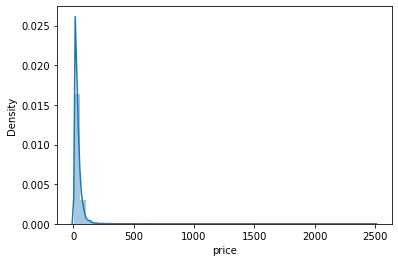

In [66]:
sns.distplot(data.price)

<AxesSubplot:xlabel='points', ylabel='Density'>

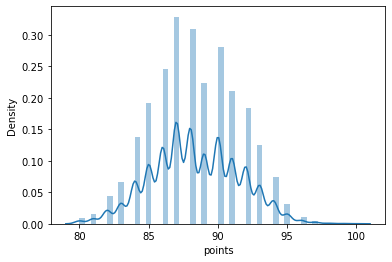

In [67]:
sns.distplot(data.points)

<AxesSubplot:xlabel='points', ylabel='Density'>

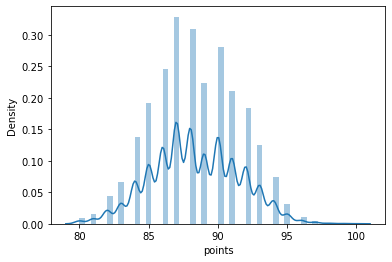

In [68]:
sns.distplot(data.points)

<AxesSubplot:xlabel='Year', ylabel='Density'>

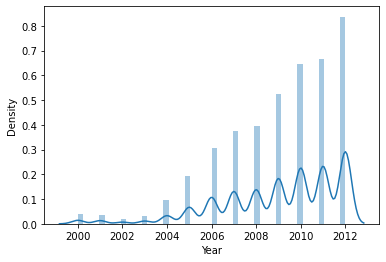

In [69]:
sns.distplot(data.Year)

In [ ]:
plot_data = data.groupby('country').filter(lambda x : len(x)>10)
Appellation_Reg = sns.countplot(y="country",
data=plot_data, palette="PuBuGn_d", order = plot_data['country'].value_counts().index);
Appellation_Reg.set(ylabel='country')

[Text(0, 0.5, 'country')]

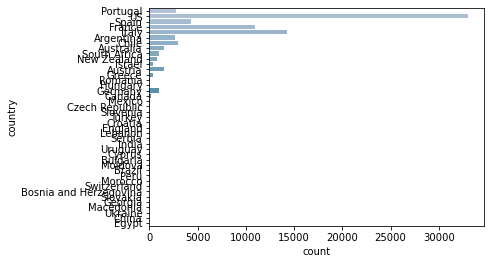

In [70]:
Appellation_Reg = sns.countplot(y="country",  
data=data, palette="PuBuGn_d");  
Appellation_Reg.set(ylabel='country') 



[Text(0, 0.5, 'taster_name')]

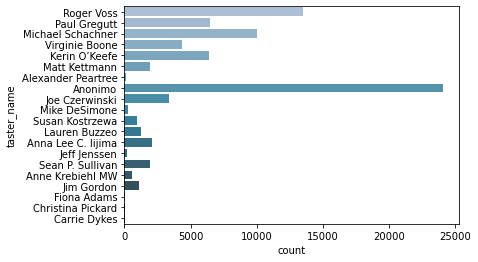

In [71]:
Appellation_Reg = sns.countplot(y="taster_name",  
data=data, palette="PuBuGn_d");  
Appellation_Reg.set(ylabel='taster_name') 


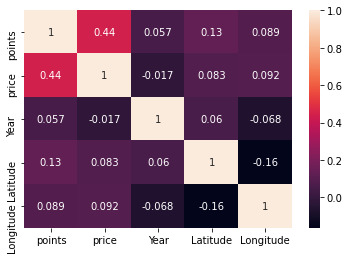

In [72]:
corrMatrix = dataframe.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

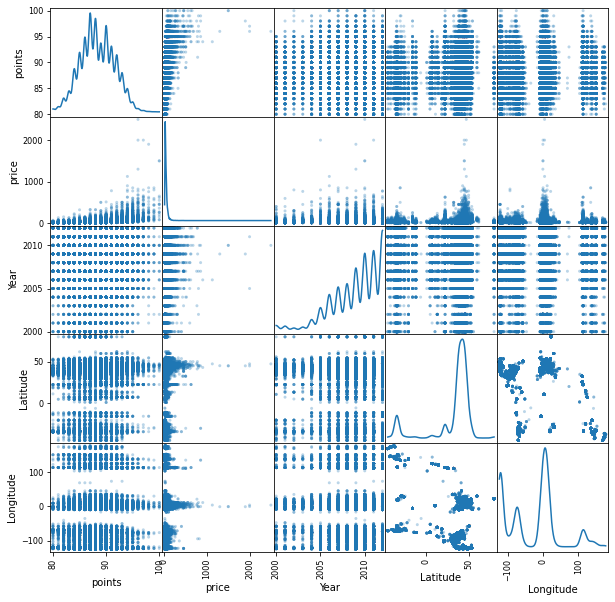

In [73]:
pd.plotting.scatter_matrix(dataframe, alpha = 0.3, figsize = (10,10), diagonal = 'kde');

<AxesSubplot:xlabel='Latitude', ylabel='Density'>

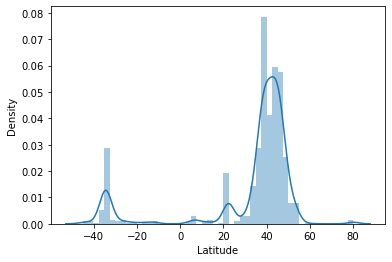

In [74]:
sns.distplot(dataframe.Latitude)

<AxesSubplot:xlabel='Longitude', ylabel='Density'>

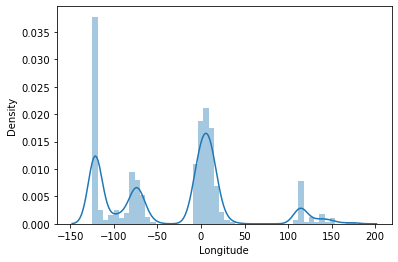

In [75]:
sns.distplot(dataframe.Longitude)

# One Hot Encoding de variables categoricas

In [ ]:
#PAIS

# Elaboración de Modelos

## 1. Regresión Lineal

## 2. Regresión- Regularización lasso

## 3. Regresión- Regularización Ridge

## 4. PCA + Regresión

## 5.Arbol de regresión

## 6.Random Forest